In [1]:
# !cd .. && mkdir build
# !cd ../build/ && rm -rf *
# !cd ../build && cmake \
#   -DPYTHON_EXECUTABLE="$(which python)" \
#   -DCMAKE_BUILD_TYPE=Release ..
# !cd ../build && make install

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt

# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/john/Desktop/TP/tp3-metnum/notebooks
Python 3.8.3


In [15]:
df = pd.read_csv('../data/train.csv')
df = df[df['provincia']=='Distrito Federal'].dropna(subset = ['habitaciones','metroscubiertos', 'banos','garages', 'antiguedad'])

X = df['habitaciones'].values
y = df['precio'].values

X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41602 entries, 1 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          41602 non-null  int64  
 1   titulo                      40653 non-null  object 
 2   descripcion                 41362 non-null  object 
 3   tipodepropiedad             41602 non-null  object 
 4   direccion                   39603 non-null  object 
 5   ciudad                      41592 non-null  object 
 6   provincia                   41602 non-null  object 
 7   antiguedad                  41602 non-null  float64
 8   habitaciones                41602 non-null  float64
 9   garages                     41602 non-null  float64
 10  banos                       41602 non-null  float64
 11  metroscubiertos             41602 non-null  float64
 12  metrostotales               26382 non-null  float64
 13  idzona                      39

In [4]:
X.shape

(41602, 1)

In [5]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

# linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y)



In [6]:
df['prediction'] = linear_regressor.predict(X)

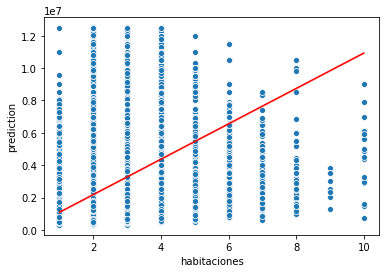

In [7]:
sns.scatterplot(data=df, x='habitaciones', y='precio')
sns.lineplot(data=df, x='habitaciones', y='prediction', color='red')

In [8]:
X2 = df[['habitaciones','metroscubiertos']].values
X2 = X2.reshape(len(X),2)
y = y.reshape(len(y),1)


linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X2,y)
df['prediction'] = linear_regressor.predict(X2)

X2.shape


(41602, 2)

In [32]:
from math import sqrt
from sklearn.metrics import  make_scorer
import datetime

def errorRMSE(y1,y2 ):
    return sqrt ( mean_squared_error(y1,y2) )

errorRMSE_scorer = make_scorer(errorRMSE)

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../data/train.csv')
df = df[df['provincia']=='Distrito Federal'].dropna(subset = ['fecha','habitaciones','metroscubiertos', 'banos','garages', 'antiguedad'])
df['fecha'] = df['fecha'].apply(lambda x: int( x.split('-')[0] ) )

X5 = df[['fecha', 'habitaciones','metroscubiertos', 'banos','garages', 'antiguedad' ]].values


X5 = X5.reshape(len(X),6)
y = y.reshape(len(y),1)

print(X5)

particiones = KFold(n_splits=10, random_state=30, shuffle=True)
# linear_regressorCV = metnum.LinearRegression()

linear_regressorCV = LinearRegression( )
knnRegresor = KNeighborsRegressor( )

parametersKNN = dict( clf__n_neighbors= [1,2,3,5,7,10,15] ,  clf__weights =['distance', 'uniform'])
parameters= dict()

pipeKnn = Pipeline([
            ('scale', StandardScaler()),

            ('clf', knnRegresor) ] ) 

pipeLR = Pipeline([
            ('scale', StandardScaler()),

            ('clf', linear_regressorCV) ] ) 

GridclfKNN = GridSearchCV(pipeKnn, parametersKNN, cv = particiones, n_jobs=-1, scoring = errorRMSE_scorer)
GridclfKNN.fit(X5,y)

GridclfLR = GridSearchCV(pipeLR, parameters, cv = particiones, n_jobs=-1  , scoring = errorRMSE_scorer   )
GridclfLR.fit(X5,y)

print("Con Regresion Lineal:")
print( GridclfLR.best_score_ ) 
print("Con Regresion KNN:")
print( GridclfKNN.best_score_ ) 
print(GridclfKNN.best_params_)

[[2.013e+03 3.000e+00 2.680e+02 2.000e+00 2.000e+00 1.000e+01]
 [2.014e+03 2.000e+00 7.500e+01 1.000e+00 1.000e+00 5.000e+00]
 [2.012e+03 3.000e+00 2.580e+02 3.000e+00 2.000e+00 2.000e+00]
 ...
 [2.015e+03 2.000e+00 1.380e+02 2.000e+00 1.000e+00 2.000e+01]
 [2.014e+03 4.000e+00 2.350e+02 4.000e+00 0.000e+00 2.000e+01]
 [2.015e+03 3.000e+00 1.490e+02 2.000e+00 2.000e+00 1.000e+00]]
Con Regresion Lineal:
1536770.0382241295
Con Regresion KNN:
1849690.0415032406
{'clf__n_neighbors': 1, 'clf__weights': 'distance'}
